# Install Requirements

In [74]:
# Don't need to run this block if you have the packages installed

# %pip install openpyxl
# %pip install xgboost
# %pip install plotnine
# %pip install seaborn
# %pip install scikit-learn
# %pip install pydot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


# Importing Python modules

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import randint, uniform

color = sns.color_palette()
np.random.seed(1)

# Read CSV files

### train_2016_df

In [2]:
train_2016_df = pd.read_csv("train_2016.csv", parse_dates=["transactiondate"])
train_2016_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
train_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   parcelid         90275 non-null  int64         
 1   logerror         90275 non-null  float64       
 2   transactiondate  90275 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


### train_2017_df

In [4]:
train_2017_df = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
train_2017_df.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [6]:
train_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   parcelid         77613 non-null  int64         
 1   logerror         77613 non-null  float64       
 2   transactiondate  77613 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.8 MB


### properties_2016_df

In [5]:
properties_2016_df = pd.read_csv("properties_2016.csv")
properties_2016_df.head()

C:\Users\gohxu\AppData\Local\Temp\ipykernel_5280\2953095298.py:1: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016_df = pd.read_csv("properties_2016.csv")


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [8]:
properties_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

### properties 2017

In [6]:
properties_2017_df = pd.read_csv("properties_2017.csv")
properties_2017_df.head()

C:\Users\gohxu\AppData\Local\Temp\ipykernel_5280\4207825859.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2017_df = pd.read_csv("properties_2017.csv")


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [10]:
properties_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

### test

In [7]:
test = pd.read_csv('sample_submission.csv')
test= test.rename(columns={'ParcelId': 'parcelid'})
print(f'test.shape: {test.shape}')
test.head()

test.shape: (2985217, 7)


,parcelid,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


### Zillow_data_dictionary

In [12]:
# read the excel file
zillow_data_dictionary_df = pd.ExcelFile('zillow_data_dictionary.xlsx')

# Track sheet names
sheet_names = zillow_data_dictionary_df.sheet_names

# Create an empty dictionary to store all contents
zillow_data_dictionary = {}

# Loop through the sheets and read them into dataframes
for sheet_name in sheet_names:
    if sheet_name == 'Data Dictionary':  # Skip this sheet
        continue
    sheet_data = {}
    for index, row in zillow_data_dictionary_df.parse(sheet_name).iterrows():
        sheet_data[row.iloc[0]] = row.iloc[1]
    zillow_data_dictionary[sheet_name] = sheet_data

for key, value in zillow_data_dictionary.items():
    print(key, value)

HeatingOrSystemTypeID {1: 'Baseboard', 2: 'Central', 3: 'Coal', 4: 'Convection', 5: 'Electric', 6: 'Forced air', 7: 'Floor/Wall', 8: 'Gas', 9: 'Geo Thermal', 10: 'Gravity', 11: 'Heat Pump', 12: 'Hot Water', 13: nan, 14: 'Other', 15: 'Oil', 16: 'Partial', 17: 'Propane', 18: 'Radiant', 19: 'Steam', 20: 'Solar', 21: 'Space/Suspended', 22: 'Vent', 23: 'Wood Burning', 24: 'Yes', 25: 'Zone'}
PropertyLandUseTypeID {31: 'Commercial/Office/Residential Mixed Used', 46: 'Multi-Story Store', 47: 'Store/Office (Mixed Use)', 246: 'Duplex (2 Units, Any Combination)', 247: 'Triplex (3 Units, Any Combination)', 248: 'Quadruplex (4 Units, Any Combination)', 260: 'Residential General', 261: 'Single Family Residential', 262: 'Rural Residence', 263: 'Mobile Home', 264: 'Townhouse', 265: 'Cluster Home', 266: 'Condominium', 267: 'Cooperative', 268: 'Row House', 269: 'Planned Unit Development', 270: 'Residential Common Area', 271: 'Timeshare', 273: 'Bungalow', 274: 'Zero Lot Line', 275: 'Manufactured, Modular

# Exploratory Data Analysis

### Log Error distribution

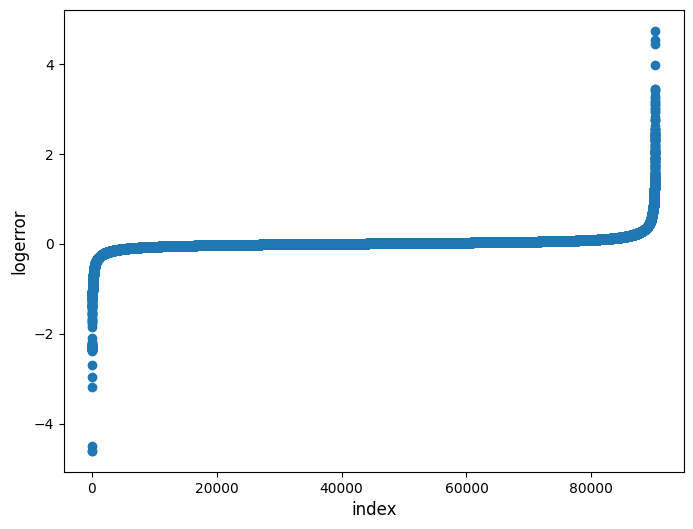

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_2016_df.shape[0]), np.sort(train_2016_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

### Transaction Date distribution

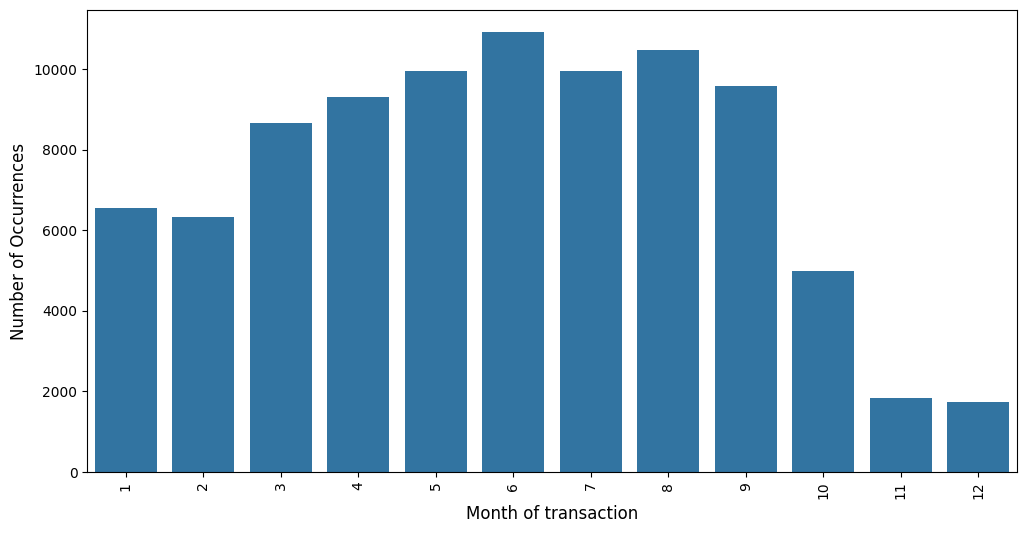

In [14]:
train_2016_df_months = train_2016_df['transactiondate'].dt.month

month_count = train_2016_df_months.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x=month_count.index, y=month_count.values)
plt.xticks(rotation = 'vertical')
plt.xlabel('Month of transaction', fontsize = 12)
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.show()

### Parcel Id Distribution of train_2016_df

In [15]:
parcel_ids = train_2016_df['parcelid'].value_counts().reset_index()
parcel_ids.columns = ['parcelid', 'transaction_count']
parcel_ids.groupby('transaction_count').aggregate('count').reset_index()

,transaction_count,parcelid
0,1,90026
1,2,123
2,3,1


### Parcel Id from properties_2016_df in train_2016_df

In [16]:
parcel_ids_in_train = pd.Series(train_2016_df['parcelid'].unique())
parcel_ids_in_properties = pd.Series(properties_2016_df['parcelid'].unique())
parcel_ids_in_train_and_properties = parcel_ids_in_train.isin(parcel_ids_in_properties)

parcel_ids_in_train_not_in_properties = parcel_ids_in_train[~parcel_ids_in_train.isin(parcel_ids_in_properties)]

print('Number of properties available: ', properties_2016_df.shape[0])
print('Number of transacted properties on record: ', parcel_ids_in_train_and_properties.shape[0])
print('Number of transacted properties not on record: ', parcel_ids_in_train_not_in_properties.shape[0])

Number of properties available:  2985217
Number of transacted properties on record:  90150
Number of transacted properties not on record:  0


### Features in properties_2016_df

In [17]:
for feature in properties_2016_df.columns:
    print(feature)

parcelid
airconditioningtypeid
architecturalstyletypeid
basementsqft
bathroomcnt
bedroomcnt
buildingclasstypeid
buildingqualitytypeid
calculatedbathnbr
decktypeid
finishedfloor1squarefeet
calculatedfinishedsquarefeet
finishedsquarefeet12
finishedsquarefeet13
finishedsquarefeet15
finishedsquarefeet50
finishedsquarefeet6
fips
fireplacecnt
fullbathcnt
garagecarcnt
garagetotalsqft
hashottuborspa
heatingorsystemtypeid
latitude
longitude
lotsizesquarefeet
poolcnt
poolsizesum
pooltypeid10
pooltypeid2
pooltypeid7
propertycountylandusecode
propertylandusetypeid
propertyzoningdesc
rawcensustractandblock
regionidcity
regionidcounty
regionidneighborhood
regionidzip
roomcnt
storytypeid
threequarterbathnbr
typeconstructiontypeid
unitcnt
yardbuildingsqft17
yardbuildingsqft26
yearbuilt
numberofstories
fireplaceflag
structuretaxvaluedollarcnt
taxvaluedollarcnt
assessmentyear
landtaxvaluedollarcnt
taxamount
taxdelinquencyflag
taxdelinquencyyear
censustractandblock


### Latitude and Longitude

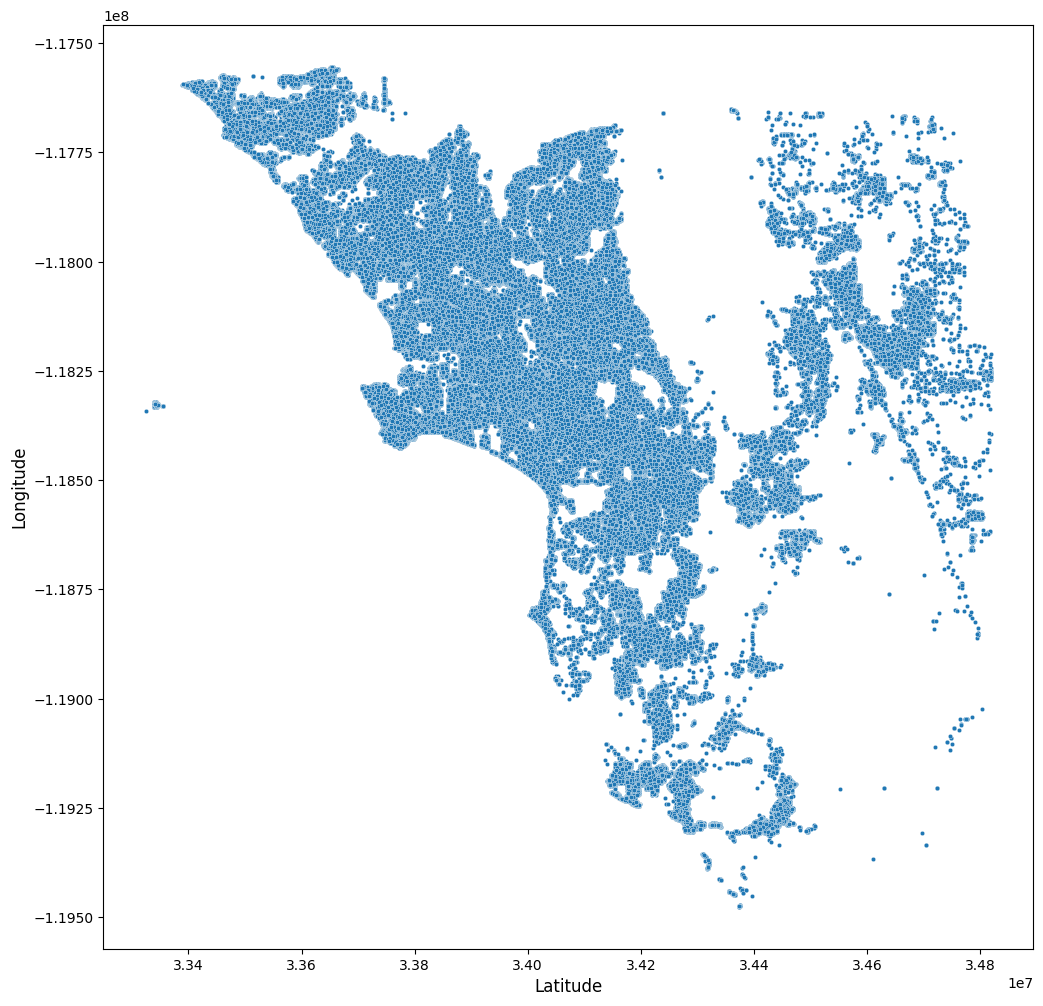

In [18]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=properties_2016_df.latitude.values, y=properties_2016_df.longitude.values, s=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

### Data Types

In [19]:
pd.options.display.max_rows = 65
dtype = properties_2016_df.dtypes.reset_index()
dtype.columns = ['count', 'data type']
dtype.groupby('data type').aggregate('count').reset_index()

,data type,count
0,int64,1
1,float64,52
2,object,5


### Columns with `object` as data type

In [20]:
object_cols = properties_2016_df.select_dtypes(include=['object']).columns.tolist()
print(object_cols)

['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc', 'fireplaceflag', 'taxdelinquencyflag']


### Missing datas (NaN values)

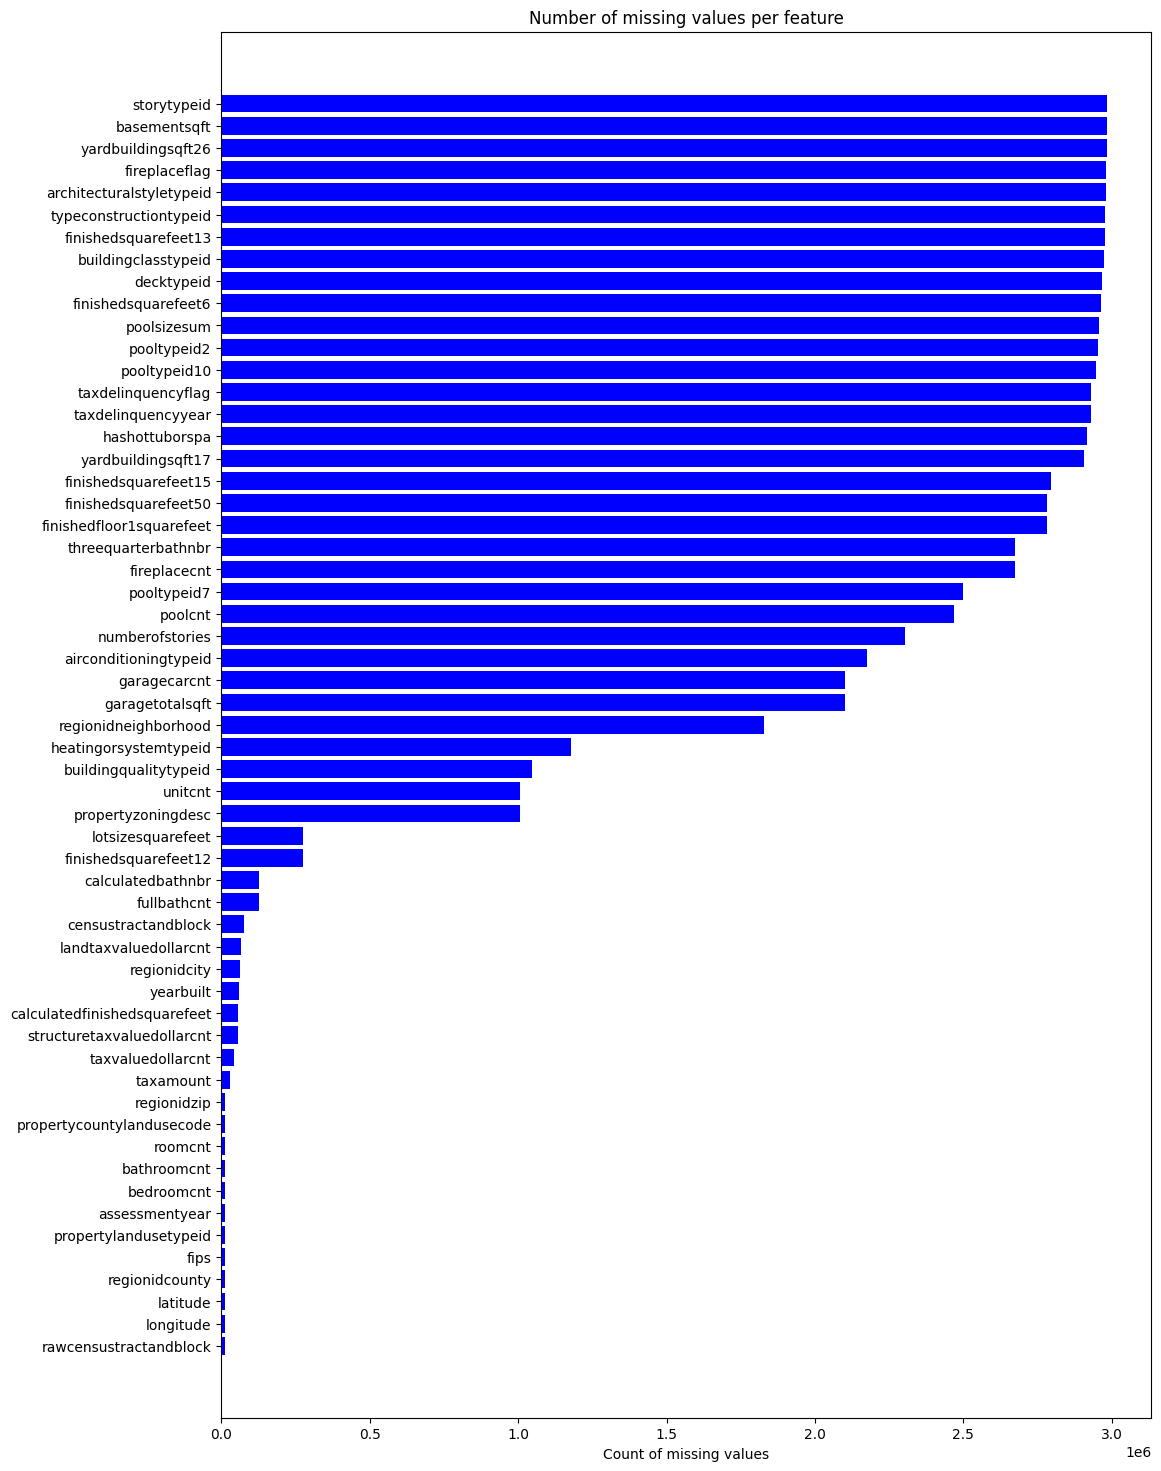

In [8]:
missing_cols = properties_2016_df.isnull().sum(axis=0).reset_index()
missing_cols.columns = ['column_name', 'missing_count']
missing_cols = missing_cols.loc[missing_cols['missing_count'] > 0]
missing_cols = missing_cols.sort_values(by='missing_count')

ind = np.arange(missing_cols.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_cols.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_cols.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values per feature")
plt.show()

In [9]:
missing_cols['missing_ratio'] = missing_cols['missing_count'] / properties_2016_df.shape[0]
high_missing_cols = missing_cols.loc[missing_cols['missing_ratio'] > 0.999]
high_missing_cols

,column_name,missing_count,missing_ratio
46,yardbuildingsqft26,2982570,0.999113
3,basementsqft,2983589,0.999455
41,storytypeid,2983593,0.999456


## Correlation Analysis

### Overlaps between properties_2016_df and properties_2017_df

In [23]:
parcel_ids_2016 = properties_2016_df['parcelid'].unique()
parcel_ids_2017 = properties_2017_df['parcelid'].unique()
parcel_ids_overlap = np.intersect1d(parcel_ids_2016, parcel_ids_2017)

print('Number of parcel ids in 2016: ', len(parcel_ids_2016))
print('Number of parcel ids in 2017: ', len(parcel_ids_2017))
print('Number of parcel ids in both 2016 and 2017: ', len(parcel_ids_overlap))


Number of parcel ids in 2016:  2985217
Number of parcel ids in 2017:  2985217
Number of parcel ids in both 2016 and 2017:  2985217


### Merge data for 2016

In [10]:
df_2016 = train_2016_df.merge(properties_2016_df, how='left', on='parcelid')
df_2016.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


### Data processing

In [11]:
encoder = LabelEncoder()

for col in df_2016.columns:
    df_2016[col] = df_2016[col].fillna(0) # replace NaN with 0
        
    if df_2016[col].dtype == 'object': # apply label encoding to object type
        encoder.fit(list(df_2016[col].values))
        df_2016[col] = encoder.transform(list(df_2016[col].values))

pd.options.display.max_rows = 65
dtype = df_2016.dtypes.reset_index()
dtype.columns = ['count', 'data type']
dtype.groupby('data type').aggregate('count').reset_index()

,data type,count
0,int64,3
1,float64,53
2,datetime64[ns],1
3,int32,3


### Correlation of variables with other features

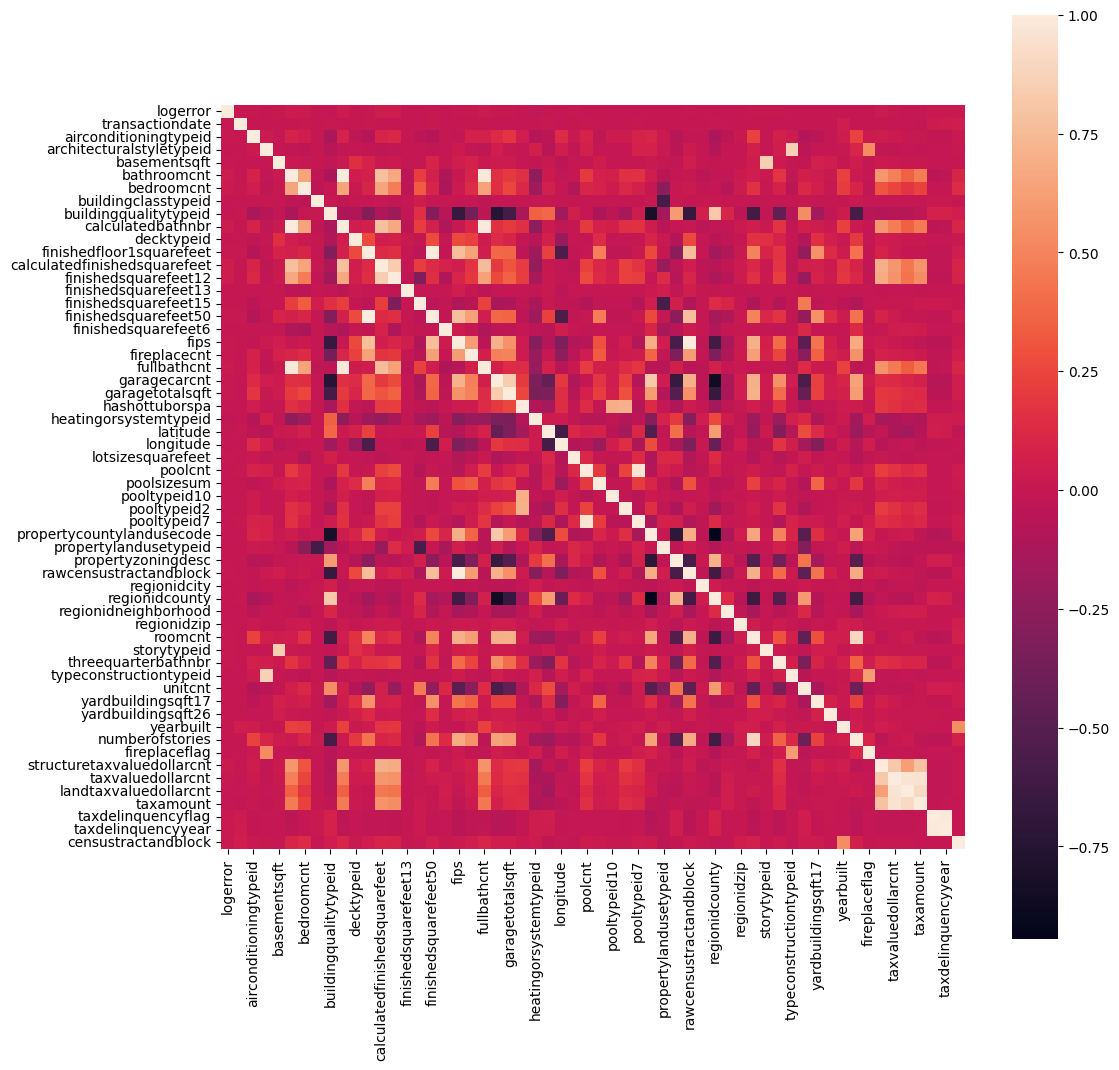

In [26]:
# get a df without parcelid, assessmentyear
df_2016_corr = df_2016.drop(['parcelid', 'assessmentyear'], axis=1)
corr = df_2016_corr.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

### Correlation between features and logerror

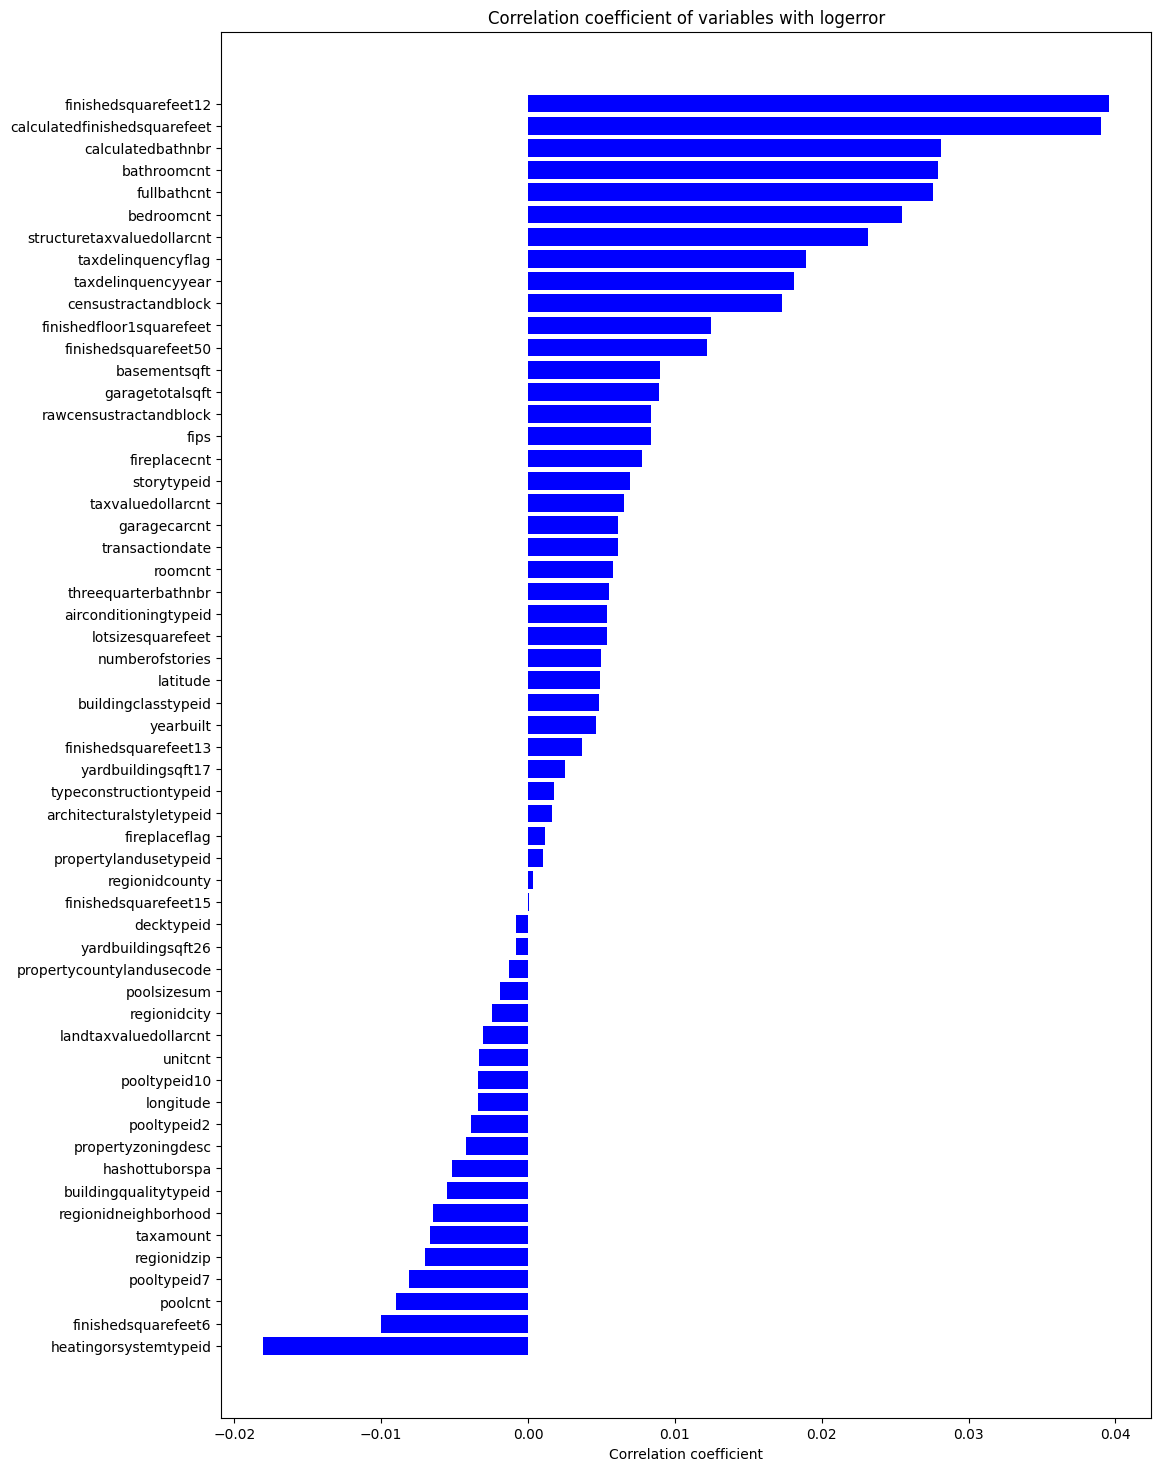

In [27]:
corr_logerror = corr['logerror'].reset_index()
corr_logerror.columns = ['feature', 'correlation']
corr_logerror = corr_logerror.loc[corr_logerror['feature'] != 'logerror']
corr_logerror = corr_logerror.sort_values(by='correlation')

ind = np.arange(corr_logerror.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, corr_logerror.correlation.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(corr_logerror.feature.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of variables with logerror")
plt.show()

### Variables with high correlation with logerror

In [28]:
corr_df_sel = corr_logerror[(corr_logerror['correlation'] > 0.02) | (corr_logerror['correlation'] < -0.01)]
corr_df_sel

,feature,correlation
24,heatingorsystemtypeid,-0.018009
51,structuretaxvaluedollarcnt,0.023141
6,bedroomcnt,0.025467
20,fullbathcnt,0.027571
5,bathroomcnt,0.027889
9,calculatedbathnbr,0.028114
12,calculatedfinishedsquarefeet,0.039011
13,finishedsquarefeet12,0.039557


### Correlation of variables with high missing data with logerror

In [29]:
corr_missing_cols = corr_logerror.loc[corr_logerror['feature'].isin(high_missing_cols['column_name'])]
corr_missing_cols

,feature,correlation
47,yardbuildingsqft26,-0.000846
42,storytypeid,0.006966
4,basementsqft,0.009019


# Feature Engineering

### Prepare training data set by combining datas from 2016 and 2017

In [12]:
# merge train_2016_df and properties_2016_df
df_2016 = train_2016_df.merge(properties_2016_df, how='left', on='parcelid')

# merge train_2017_df and properties_2017_df
df_2017 = train_2017_df.merge(properties_2017_df, how='left', on='parcelid')

# merge df_2016 and df_2017
df_train_all = pd.concat([df_2016, df_2017], axis=0)
df_train_all.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [31]:
df_train_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167888 entries, 0 to 77612
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   parcelid                      167888 non-null  int64         
 1   logerror                      167888 non-null  float64       
 2   transactiondate               167888 non-null  datetime64[ns]
 3   airconditioningtypeid         53788 non-null   float64       
 4   architecturalstyletypeid      468 non-null     float64       
 5   basementsqft                  93 non-null      float64       
 6   bathroomcnt                   167854 non-null  float64       
 7   bedroomcnt                    167854 non-null  float64       
 8   buildingclasstypeid           31 non-null      float64       
 9   buildingqualitytypeid         107173 non-null  float64       
 10  calculatedbathnbr             166056 non-null  float64       
 11  decktypeid         

### Remove outliers in log error

C:\Users\gohxu\AppData\Local\Temp\ipykernel_5280\3227468244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_all['logerror'].loc[df_train_all['logerror'] > ulimit] = ulimit
C:\Users\gohxu\AppData\Local\Temp\ipykernel_5280\3227468244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_all['logerror'].loc[df_train_all['logerror'] < llimit] = llimit
C:\Users\gohxu\AppData\Local\Temp\ipykernel_5280\3227468244.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

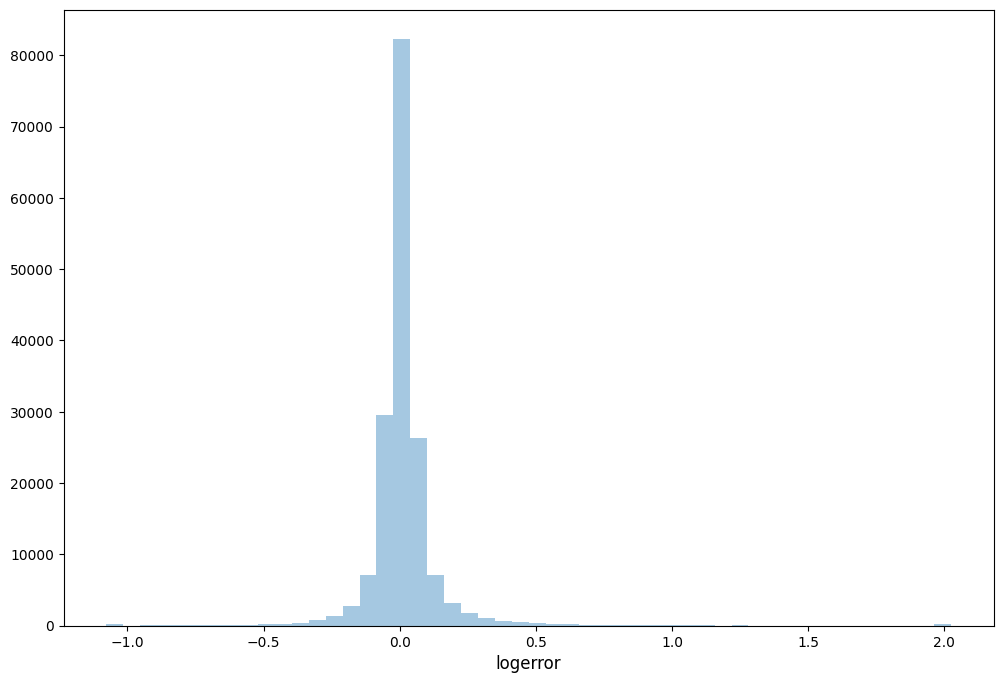

In [13]:
ulimit = np.percentile(df_train_all.logerror.values, 99.9)
llimit = np.percentile(df_train_all.logerror.values, 0.1)
df_train_all['logerror'].loc[df_train_all['logerror'] > ulimit] = ulimit
df_train_all['logerror'].loc[df_train_all['logerror'] < llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(df_train_all.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

### Drop columns with high ratio of empty values

In [14]:
for drop in high_missing_cols['column_name'].tolist():
    if drop in df_train_all.columns:
        df_train_all = df_train_all.drop(drop, axis=1)
df_train_all.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,3.0,2.0,NaN,4.0,3.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,2.0,2.0,NaN,4.0,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


### Perform label encoding

In [15]:
encoder = LabelEncoder()
for col in df_train_all.columns:
    df_train_all[col] = df_train_all[col].fillna(0) # replace NaN with 0
        
    if df_train_all[col].dtype == 'object': # apply label encoding to object type
        encoder.fit(list(df_train_all[col].values))
        df_train_all[col] = encoder.transform(list(df_train_all[col].values))

pd.options.display.max_rows = 65
dtype = df_train_all.dtypes.reset_index()
dtype.columns = ['count', 'data type']
dtype.groupby('data type').aggregate('count').reset_index()

,data type,count
0,int64,3
1,float64,50
2,datetime64[ns],1
3,int32,3


### Convert datetime data type to int data type

In [16]:
df_train_all['transactiondate'] = pd.to_datetime(df_train_all['transactiondate'])
df_train_all['transactiondate'] = df_train_all['transactiondate'].dt.year + df_train_all['transactiondate'].dt.month/12.0 + df_train_all['transactiondate'].dt.day/365.0
df_train_all.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016.086073,1.0,0.0,2.0,3.0,0.0,4.0,2.0,...,0.0,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,0.0,6.037107e+13
1,14366692,-0.1684,2016.086073,0.0,0.0,3.5,4.0,0.0,0.0,3.5,...,0.0,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,0.0,0.000000e+00
2,12098116,-0.0040,2016.086073,1.0,0.0,3.0,2.0,0.0,4.0,3.0,...,0.0,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,0.0,6.037464e+13
3,12643413,0.0218,2016.088813,1.0,0.0,2.0,2.0,0.0,4.0,2.0,...,0.0,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,0.0,6.037296e+13
4,14432541,-0.0050,2016.088813,0.0,0.0,2.5,4.0,0.0,0.0,2.5,...,2.0,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,0.0,6.059042e+13


### Bathrooms per bedrooms

In [17]:
df_train_all['bathroomsperbedroom'] = df_train_all['bathroomcnt'] / df_train_all['bedroomcnt']
df_train_all['bathroomsperbedroom'] = df_train_all['bathroomsperbedroom'].replace(np.nan, 0)
df_train_all['bathroomsperbedroom'] = df_train_all['bathroomsperbedroom'].replace(np.inf, 0)
df_train_all.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,bathroomsperbedroom
0,11016594,0.0276,2016.086073,1.0,0.0,2.0,3.0,0.0,4.0,2.0,...,0,122754.0,360170.0,2015.0,237416.0,6735.88,0,0.0,6.037107e+13,0.666667
1,14366692,-0.1684,2016.086073,0.0,0.0,3.5,4.0,0.0,0.0,3.5,...,0,346458.0,585529.0,2015.0,239071.0,10153.02,0,0.0,0.000000e+00,0.875000
2,12098116,-0.0040,2016.086073,1.0,0.0,3.0,2.0,0.0,4.0,3.0,...,0,61994.0,119906.0,2015.0,57912.0,11484.48,0,0.0,6.037464e+13,1.500000
3,12643413,0.0218,2016.088813,1.0,0.0,2.0,2.0,0.0,4.0,2.0,...,0,171518.0,244880.0,2015.0,73362.0,3048.74,0,0.0,6.037296e+13,1.000000
4,14432541,-0.0050,2016.088813,0.0,0.0,2.5,4.0,0.0,0.0,2.5,...,0,169574.0,434551.0,2015.0,264977.0,5488.96,0,0.0,6.059042e+13,0.625000


### Living area proportions

In [18]:
df_train_all['livingareaprop'] = df_train_all['calculatedfinishedsquarefeet'] / df_train_all['lotsizesquarefeet']
df_train_all['livingareaprop'] = df_train_all['livingareaprop'].replace(np.nan, 0)
df_train_all['livingareaprop'] = df_train_all['livingareaprop'].replace(np.inf, 0)
df_train_all.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,bathroomsperbedroom,livingareaprop
0,11016594,0.0276,2016.086073,1.0,0.0,2.0,3.0,0.0,4.0,2.0,...,122754.0,360170.0,2015.0,237416.0,6735.88,0,0.0,6.037107e+13,0.666667,0.223698
1,14366692,-0.1684,2016.086073,0.0,0.0,3.5,4.0,0.0,0.0,3.5,...,346458.0,585529.0,2015.0,239071.0,10153.02,0,0.0,0.000000e+00,0.875000,0.621191
2,12098116,-0.0040,2016.086073,1.0,0.0,3.0,2.0,0.0,4.0,3.0,...,61994.0,119906.0,2015.0,57912.0,11484.48,0,0.0,6.037464e+13,1.500000,0.194082
3,12643413,0.0218,2016.088813,1.0,0.0,2.0,2.0,0.0,4.0,2.0,...,171518.0,244880.0,2015.0,73362.0,3048.74,0,0.0,6.037296e+13,1.000000,0.011840
4,14432541,-0.0050,2016.088813,0.0,0.0,2.5,4.0,0.0,0.0,2.5,...,169574.0,434551.0,2015.0,264977.0,5488.96,0,0.0,6.059042e+13,0.625000,0.380500


### Outdoor space to living area ratio

In [19]:
df_train_all['outdoorlivingprop'] = df_train_all['yardbuildingsqft17'] / df_train_all['calculatedfinishedsquarefeet']
df_train_all['outdoorlivingprop'] = df_train_all['outdoorlivingprop'].replace(np.nan, 0)
df_train_all['outdoorlivingprop'] = df_train_all['outdoorlivingprop'].replace(np.inf, 0)
df_train_all.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,bathroomsperbedroom,livingareaprop,outdoorlivingprop
0,11016594,0.0276,2016.086073,1.0,0.0,2.0,3.0,0.0,4.0,2.0,...,360170.0,2015.0,237416.0,6735.88,0,0.0,6.037107e+13,0.666667,0.223698,0.0
1,14366692,-0.1684,2016.086073,0.0,0.0,3.5,4.0,0.0,0.0,3.5,...,585529.0,2015.0,239071.0,10153.02,0,0.0,0.000000e+00,0.875000,0.621191,0.0
2,12098116,-0.0040,2016.086073,1.0,0.0,3.0,2.0,0.0,4.0,3.0,...,119906.0,2015.0,57912.0,11484.48,0,0.0,6.037464e+13,1.500000,0.194082,0.0
3,12643413,0.0218,2016.088813,1.0,0.0,2.0,2.0,0.0,4.0,2.0,...,244880.0,2015.0,73362.0,3048.74,0,0.0,6.037296e+13,1.000000,0.011840,0.0
4,14432541,-0.0050,2016.088813,0.0,0.0,2.5,4.0,0.0,0.0,2.5,...,434551.0,2015.0,264977.0,5488.96,0,0.0,6.059042e+13,0.625000,0.380500,0.0


# Model Preparation

### Training data

In [20]:
train_copy = df_train_all.copy()
for column in ['parcelid', 'logerror', 'propertyzoningdesc', 'propertycountylandusecode', 'fireplaceflag', 'hashottuborspa']:
    if column in train_copy.columns:
        train_copy = train_copy.drop(column, axis=1)
train_copy.head()

,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,bathroomsperbedroom,livingareaprop,outdoorlivingprop
0,2016.086073,1.0,0.0,2.0,3.0,0.0,4.0,2.0,0.0,0.0,...,360170.0,2015.0,237416.0,6735.88,0,0.0,6.037107e+13,0.666667,0.223698,0.0
1,2016.086073,0.0,0.0,3.5,4.0,0.0,0.0,3.5,0.0,0.0,...,585529.0,2015.0,239071.0,10153.02,0,0.0,0.000000e+00,0.875000,0.621191,0.0
2,2016.086073,1.0,0.0,3.0,2.0,0.0,4.0,3.0,0.0,0.0,...,119906.0,2015.0,57912.0,11484.48,0,0.0,6.037464e+13,1.500000,0.194082,0.0
3,2016.088813,1.0,0.0,2.0,2.0,0.0,4.0,2.0,0.0,0.0,...,244880.0,2015.0,73362.0,3048.74,0,0.0,6.037296e+13,1.000000,0.011840,0.0
4,2016.088813,0.0,0.0,2.5,4.0,0.0,0.0,2.5,0.0,0.0,...,434551.0,2015.0,264977.0,5488.96,0,0.0,6.059042e+13,0.625000,0.380500,0.0


### Data Split

In [21]:
# split data for cross validation
X = train_copy
Y = df_train_all['logerror'].values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Xtrain.shape: {Xtrain.shape}')
print(f'Xtest.shape: {Xtest.shape}')
print(f'Ytrain.shape: {Ytrain.shape}')
print(f'Ytest.shape: {Ytest.shape}')

Xtrain.shape: (134310, 54)
Xtest.shape: (33578, 54)
Ytrain.shape: (134310,)
Ytest.shape: (33578,)


### Data Scaling

In [22]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

### Check Accuracy of Model

In [23]:
def test_model(model, test):
    """
    Prints the mean absolute error of the model on the test set

    Parameters
    ----------
    model: The model to be evaluated
    test: The formatted test input for the model

    Returns
    -------
    None
    """
    Ypred = model.predict(test)
    mae = mean_absolute_error(Ytest, Ypred)
    mse = mean_squared_error(Ytest, Ypred)
    rmse = np.sqrt(mse)

    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')

## Random Forest Regressor

In [42]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(Xtrain, Ytrain)

test_model(rf_model, Xtest)

MAE: 0.07506140789411238
RMSE: 0.17098880201168662


#### Hyperparameter Tuning

In [43]:
# Create the random grid
rf_random_grid = {'n_estimators': [200, 400, 800],
               'max_features': ['log2', 'sqrt', None],
               'max_depth': [10, 20, 40, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_random_grid, n_iter = 30, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(Xtrain, Ytrain)

rf_random.best_params_

Fitting 2 folds for each of 30 candidates, totalling 60 fits


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [44]:
# Test best random estimator
rf_model = rf_random.best_estimator_
test_model(rf_model, Xtest)

MAE: 0.07000297283759345
RMSE: 0.16761927762447645


In [45]:
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [46]:
rf_model_2 = RandomForestRegressor(
    n_estimators=900,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=40,
    bootstrap=True
)

rf_model_2.fit(Xtrain, Ytrain)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=900)

In [47]:
test_model(rf_model_2, Xtest)

MAE: 0.07061170727757023
RMSE: 0.1676368853291465


In [48]:
joblib.dump(rf_model_2, 'random_forest_model_2.joblib')

['random_forest_model_2.joblib']

## Neural Network

In [75]:
neural_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
neural_model.fit(Xtrain, Ytrain)

test_model(neural_model, Xtest)

MAE: 0.07286262917991876
RMSE: 0.1700781756740606


## XGBoost

In [24]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(Xtrain, Ytrain)

test_model(xgb_model, Xtest)

MAE: 0.0707539280188608
RMSE: 0.1521514247054254


### Hyperparameter Tuning

In [25]:
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(5, 10),
    'subsample': uniform(0.6, 0.2),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 5, 10],
    'lambda': uniform(0, 1),
    'alpha': uniform(0, 1),
    'n_estimators': randint(50, 200),
}

xgb_ = xgb.XGBRegressor()

xgb_random = RandomizedSearchCV(
    xgb_,
    param_distributions=param_dist,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

xgb_random.fit(Xtrain, Ytrain)

xgb_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'alpha': 0.5724885171916063,
 'colsample_bytree': 0.8932570101150044,
 'gamma': 0,
 'lambda': 0.44380798765185403,
 'learning_rate': 0.015795624633561038,
 'max_depth': 7,
 'min_child_weight': 10,
 'n_estimators': 57,
 'subsample': 0.6685377815906564}

In [26]:
xgb_model = xgb_random.best_estimator_
test_model(xgb_model, Xtest)

MAE: 0.06837141637935186
RMSE: 0.1513183908303847


In [27]:
y_mean = np.mean(Ytrain)
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}
dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest)
num_boost_rounds = 50

xgb_model_2 = xgb.train(dict(xgb_params, verbosity=0), dtrain, num_boost_round=num_boost_rounds)

In [28]:
test_model(xgb_model_2, dtest)

MAE: 0.06844241604367347
RMSE: 0.15089330077776003


## Stacking Regressor

In [ ]:
# Create a stacking regressor
meta_model = xgb.XGBRegressor()

stack_model = StackingRegressor(
    estimators=[
        ('rf', rf_model),
        ('neural', neural_model),
        ('xgb', xgb_model)
    ],
    final_estimator=meta_model,
    cv=2
)

stack_model.fit(Xtrain, Ytrain)
test_model(stack_model, Xtest)

# Submission

## Preparing Submission Data

In [29]:
df_test = test.merge(properties_2016_df, how='left', on='parcelid')

### Drop columns

In [30]:
for drop in high_missing_cols['column_name'].tolist():
    if drop in df_test.columns:
        df_test = df_test.drop(drop, axis=1)

for column in ['parcelid', '201610', '201611', '201612', '201710', '201711', '201712', 'propertyzoningdesc', 'propertycountylandusecode', 'fireplaceflag', 'hashottuborspa']:
    if column in df_test.columns:
        df_test = df_test.drop(column, axis=1)

df_test.head()

,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,...,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,...,1947.0,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


### Label Encoding

In [31]:
for col in df_test.columns:
    df_test[col] = df_test[col].fillna(0)        
    if df_test[col].dtype == 'object': 
        encoder.fit(list(df_test[col].values))
        df_test[col] = encoder.transform(list(df_test[col].values))

df_test.head()

,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,2015.0,9.0,0.00,0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,27516.0,2015.0,27516.0,0.00,0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73026.0,...,0.0,0.0,650756.0,1413387.0,2015.0,762631.0,20800.37,0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0,5068.0,...,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,0,0.0,0.0
4,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1776.0,...,1947.0,0.0,193796.0,433491.0,2015.0,239695.0,5725.17,0,0.0,0.0


### Add Bathrooms per Bedrooms

In [32]:
df_test['bathroomsperbedroom'] = df_test['bathroomcnt'] / df_test['bedroomcnt']
df_test['bathroomsperbedroom'] = df_test['bathroomsperbedroom'].replace(np.nan, 0)
df_test['bathroomsperbedroom'] = df_test['bathroomsperbedroom'].replace(np.inf, 0)

### Add Living area proportions

In [33]:
df_test['livingareaprop'] = df_test['calculatedfinishedsquarefeet'] / df_test['lotsizesquarefeet']
df_test['livingareaprop'] = df_test['livingareaprop'].replace(np.nan, 0)
df_test['livingareaprop'] = df_test['livingareaprop'].replace(np.inf, 0)

### Add Outdoor space to living area ratio

In [34]:
df_test['outdoorlivingprop'] = df_test['yardbuildingsqft17'] / df_test['calculatedfinishedsquarefeet']
df_test['outdoorlivingprop'] = df_test['outdoorlivingprop'].replace(np.nan, 0)
df_test['outdoorlivingprop'] = df_test['outdoorlivingprop'].replace(np.inf, 0)


### Create transaction date column

In [35]:
df_test.insert(0, 'transactiondate', 0)
df_test.head()

,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,bathroomsperbedroom,livingareaprop,outdoorlivingprop
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,2015.0,9.0,0.00,0,0.0,0.0,0.0,0.000000,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27516.0,2015.0,27516.0,0.00,0,0.0,0.0,0.0,0.000000,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1413387.0,2015.0,762631.0,20800.37,0,0.0,0.0,0.0,1.157581,0.0
3,0,0.0,0.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0,...,1156834.0,2015.0,585488.0,14557.57,0,0.0,0.0,0.0,0.673847,0.0
4,0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,433491.0,2015.0,239695.0,5725.17,0,0.0,0.0,0.0,0.208647,0.0


### Data Scaling

In [36]:
loaded_scaler = joblib.load('scaler.joblib')

# get a list of all columns names in df_test
cols = df_test.columns.tolist()

# Assuming Xtest_new is your new data that you want to transform
df_test = loaded_scaler.transform(df_test)

# Convert back to dataframe
df_test = pd.DataFrame(df_test, columns=cols)
df_test.head()

,transactiondate,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,bathroomsperbedroom,livingareaprop,outdoorlivingprop
0,-3917.087738,-0.308556,-0.048898,-2.286622,-2.644026,-0.013070,-1.177944,-2.285221,-0.08626,-0.258235,...,-0.773983,-0.004406,-0.636269,-0.820335,-0.169081,-0.167002,-13.315123,-2.583877,-1.050896,-0.143212
1,-3917.087738,-0.308556,-0.048898,-2.286622,-2.644026,-0.013070,-1.177944,-2.285221,-0.08626,-0.258235,...,-0.728969,-0.004406,-0.575723,-0.820335,-0.169081,-0.167002,-13.315123,-2.583877,-1.050896,-0.143212
2,-3917.087738,-0.308556,-0.048898,-2.286622,-2.644026,-0.013070,-1.177944,-2.285221,-0.08626,-0.258235,...,1.538960,-0.004406,1.042349,2.027254,-0.169081,-0.167002,-13.315123,-2.583877,4.279547,-0.143212
3,-3917.087738,-0.308556,-0.048898,-2.286622,-2.644026,57.857655,0.972091,-2.285221,-0.08626,-0.258235,...,1.119120,-0.004406,0.652437,1.172609,-0.169081,-0.167002,-13.315123,-2.583877,2.052041,-0.143212
4,-3917.087738,-0.308556,-0.048898,-2.286622,-2.644026,77.147896,-1.177944,-2.285221,-0.08626,-0.258235,...,-0.064605,-0.004406,-0.108693,-0.036555,-0.169081,-0.167002,-13.315123,-2.583877,-0.090117,-0.143212


In [37]:
test_dates_in_datetime = ['2016-10-01','2016-11-01','2016-12-01','2017-10-01','2017-11-01','2017-12-01']
test_dates = []
for date in test_dates_in_datetime:
    # convert date to float
    date = date.split('-')
    test_dates.append(float(date[0]) + float(date[1])/12.0 + float(date[2])/365.0)
print(test_dates)
test_columns = ['201610','201611','201612','201710','201711','201712']

[2016.8360730593606, 2016.919406392694, 2017.0027397260274, 2017.8360730593606, 2017.919406392694, 2018.0027397260274]


## Helper Function to Generate Submission

In [38]:
def run_model(models, weights=None):
    """
    Outputs the weighted average predictions of the models on the test set.

    Parameters
    ----------
    models: list of models
        List of models to be evaluated.

    weights: list of float, optional
        List of weights for the models. If not provided, equal weights are assumed.

    Returns
    -------
    new_submission: DataFrame
        The weighted average predictions of the models on the test set.

    """
    if weights is None:
        weights = [1.0 / len(models)] * len(models)  # Equal weights if not provided

    new_submission = test.copy()
    new_test = df_test.copy()

    for i in range(len(test_dates)):
        new_test['transactiondate'] = test_dates[i]

        # Predictions from each model
        predictions = []

        for model in models:
            try:
                # If it's an XGBoost model, accumulate predictions
                if isinstance(model, xgb.Booster):
                    pred = model.predict(xgb.DMatrix(new_test))
                else:
                    # Try using model.predict for most models
                    pred = model.predict(new_test)
            except Exception as e:
                pred = None

            if pred is not None:
                predictions.append(pred)

        # Weighted average
        weighted_avg_pred = sum(weight * pred for weight, pred in zip(weights, predictions))

        # Format and assign to the new_submission DataFrame
        new_submission[test_columns[i]] = [float(format(output, '.4f')) for output in weighted_avg_pred]


    print(new_submission)
    return new_submission


def save_submission(submission, model_name):
    print("Saving submission...")
    """
    Saves the submission to a csv file

    Parameters
    ----------
    submission: The submission to be saved
    model_name: The name of the model

    Returns
    -------
    None
    """
    submission.to_csv(f'{model_name}.csv', index=False)
    print('Submission saved')

## Submissions

In [ ]:
models = [stack_model]
new_submission = run_model(models)
save_submission(new_submission, 'stack_model')

In [66]:
models = [rf_model, neural_model, xgb_model]
new_submission = run_model(models)
save_submission(new_submission, 'average_model')

c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dty

          parcelid  201610  201611  201612  201710  201711  201712
0         10754147  4.3960  4.3962  4.3963  4.3980  4.3982  4.3984
1         10759547  4.2850  4.2852  4.2853  4.2871  4.2872  4.2874
2         10843547  4.8474  4.8476  4.8478  4.8498  4.8500  4.8502
3         10859147  4.0161  4.0162  4.0164  4.0181  4.0183  4.0185
4         10879947  3.7924  3.7926  3.7928  3.7945  3.7946  3.7948
...            ...     ...     ...     ...     ...     ...     ...
2985212  168176230  4.4770  4.4772  4.4774  4.4791  4.4793  4.4794
2985213   14273630  4.4770  4.4772  4.4774  4.4791  4.4793  4.4794
2985214  168040630  4.4770  4.4772  4.4774  4.4791  4.4793  4.4794
2985215  168040830  4.4770  4.4772  4.4774  4.4791  4.4793  4.4794
2985216  168040430  4.4770  4.4772  4.4774  4.4791  4.4793  4.4794

[2985217 rows x 7 columns]
Saving submission...
Submission saved


In [67]:
models = [rf_model, neural_model, xgb_model]

mae_rf = 0.07000297283759345
mae_nn = 0.07115035779586915
mae_xgb = 0.06972205237760512

# Calculate the inverse of MAE as weights
weight_rf = 1 / mae_rf
weight_nn = 1 / mae_nn
weight_xgb = 1 / mae_xgb

# Sum of weights for normalization
total_weight = weight_rf + weight_nn + weight_xgb

# Normalize weights to make them add up to 1
weight_rf /= total_weight
weight_nn /= total_weight
weight_xgb /= total_weight

weights = [weight_rf, weight_nn, weight_xgb]

new_submission = run_model(models, weights)
save_submission(new_submission, 'weighted_average_model')

c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dty

          parcelid  201610  201611  201612  201710  201711  201712
0         10754147  4.3452  4.3453  4.3455  4.3472  4.3474  4.3475
1         10759547  4.2336  4.2338  4.2340  4.2357  4.2359  4.2360
2         10843547  4.7909  4.7911  4.7913  4.7933  4.7935  4.7937
3         10859147  3.9691  3.9693  3.9694  3.9711  3.9713  3.9715
4         10879947  3.7463  3.7465  3.7467  3.7484  3.7486  3.7487
...            ...     ...     ...     ...     ...     ...     ...
2985212  168176230  4.4229  4.4230  4.4232  4.4249  4.4251  4.4253
2985213   14273630  4.4229  4.4230  4.4232  4.4249  4.4251  4.4253
2985214  168040630  4.4229  4.4230  4.4232  4.4249  4.4251  4.4253
2985215  168040830  4.4229  4.4230  4.4232  4.4249  4.4251  4.4253
2985216  168040430  4.4229  4.4230  4.4232  4.4249  4.4251  4.4253

[2985217 rows x 7 columns]
Saving submission...
Submission saved


In [39]:
models = [xgb_model]
new_submission = run_model(models)

save_submission(new_submission, 'xgb_model')

c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

          parcelid  201610  201611  201612  201710  201711  201712
0         10754147  0.1625  0.1625  0.1625  0.1625  0.1625  0.1625
1         10759547  0.0492  0.0492  0.0492  0.0492  0.0492  0.0492
2         10843547  0.0314  0.0314  0.0314  0.0314  0.0314  0.0314
3         10859147  0.0750  0.0750  0.0750  0.0750  0.0750  0.0750
4         10879947  0.0172  0.0172  0.0172  0.0172  0.0172  0.0172
...            ...     ...     ...     ...     ...     ...     ...
2985212  168176230 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018
2985213   14273630 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018
2985214  168040630 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018
2985215  168040830 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018
2985216  168040430 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018 -0.0018

[2985217 rows x 7 columns]
Saving submission...
Submission saved


In [70]:
models = [rf_model]
new_submission = run_model(models)

c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packag

          parcelid  201610  201611  201612  201710  201711  201712
0         10754147  0.2061  0.2061  0.2061  0.2061  0.2061  0.2061
1         10759547  0.0542  0.0542  0.0542  0.0542  0.0542  0.0542
2         10843547  0.0945  0.0945  0.0945  0.0945  0.0945  0.0945
3         10859147  0.0663  0.0663  0.0663  0.0663  0.0663  0.0663
4         10879947 -0.0136 -0.0136 -0.0136 -0.0136 -0.0136 -0.0136
...            ...     ...     ...     ...     ...     ...     ...
2985212  168176230  0.0102  0.0102  0.0102  0.0102  0.0102  0.0102
2985213   14273630  0.0102  0.0102  0.0102  0.0102  0.0102  0.0102
2985214  168040630  0.0102  0.0102  0.0102  0.0102  0.0102  0.0102
2985215  168040830  0.0102  0.0102  0.0102  0.0102  0.0102  0.0102
2985216  168040430  0.0102  0.0102  0.0102  0.0102  0.0102  0.0102

[2985217 rows x 7 columns]


In [76]:
models = [neural_model]
new_submission = run_model(models)

c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has fe

          parcelid   201610   201611   201612   201710   201711   201712
0         10754147  47.9455  47.9474  47.9494  47.9690  47.9710  47.9729
1         10759547  47.9529  47.9549  47.9569  47.9765  47.9784  47.9804
2         10843547  50.2401  50.2421  50.2440  50.2638  50.2658  50.2677
3         10859147  47.3191  47.3210  47.3230  47.3426  47.3445  47.3465
4         10879947  47.0327  47.0346  47.0366  47.0562  47.0581  47.0601
...            ...      ...      ...      ...      ...      ...      ...
2985212  168176230  50.9928  50.9948  50.9968  51.0165  51.0184  51.0204
2985213   14273630  50.9928  50.9948  50.9968  51.0165  51.0184  51.0204
2985214  168040630  50.9928  50.9948  50.9968  51.0165  51.0184  51.0204
2985215  168040830  50.9928  50.9948  50.9968  51.0165  51.0184  51.0204
2985216  168040430  50.9928  50.9948  50.9968  51.0165  51.0184  51.0204

[2985217 rows x 7 columns]


In [77]:
models = [rf_model, xgb_model]
new_submission = run_model(models)

c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\gohxu\anaconda3\envs\mlproject\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\gohxu\anaconda3\envs\mlproject\

          parcelid  201610  201611  201612  201710  201711  201712
0         10754147  0.2107  0.2107  0.2107  0.2107  0.2107  0.2107
1         10759547  0.0559  0.0559  0.0559  0.0559  0.0559  0.0559
2         10843547  0.1875  0.1875  0.1875  0.1875  0.1875  0.1875
3         10859147  0.1401  0.1401  0.1401  0.1401  0.1401  0.1401
4         10879947 -0.0023 -0.0023 -0.0023 -0.0023 -0.0023 -0.0023
...            ...     ...     ...     ...     ...     ...     ...
2985212  168176230  0.0173  0.0173  0.0173  0.0173  0.0173  0.0173
2985213   14273630  0.0173  0.0173  0.0173  0.0173  0.0173  0.0173
2985214  168040630  0.0173  0.0173  0.0173  0.0173  0.0173  0.0173
2985215  168040830  0.0173  0.0173  0.0173  0.0173  0.0173  0.0173
2985216  168040430  0.0173  0.0173  0.0173  0.0173  0.0173  0.0173

[2985217 rows x 7 columns]


In [78]:
save_submission(new_submission, 'rf_xgb_model')

Saving submission...
Submission saved
